In [80]:
import pandas as po
%matplotlib inline
import matplotlib.pyplot as plt

In [73]:
Titanic_Data = po.read_excel(r"C:\Users\c248129\Downloads\titanic3.xls")
Titanic_Data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [75]:
Titanic_Data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [76]:
Titanic_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


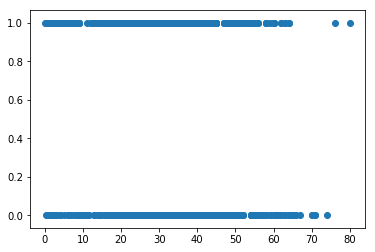

In [86]:
plt.scatter(Titanic_Data['age'],Titanic_Data['survived'])

In [87]:
features=Titanic_Data.drop(["survived","name","ticket","cabin"],axis=1)

In [32]:
labels=Titanic_Data.survived

In [89]:
Titanic = Titanic_Data.copy()
Titanic = Titanic.drop(['boat','body','home.dest',"survived","name","ticket","cabin"],axis = 1,inplace = False)
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1309 non-null int64
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [90]:
print(Titanic['sex'].unique())
print(Titanic['embarked'].unique())

['female' 'male']
['S' 'C' nan 'Q']


In [92]:
dummy_gender = po.get_dummies(Titanic['sex']).rename(columns=lambda x: 'sex_' + str(x))
dummy_embarked = po.get_dummies(Titanic['embarked']).rename(columns=lambda x: 'embarked_' + str(x))
Titanic_New = po.concat([Titanic, dummy_gender, dummy_embarked], axis=1)
Titanic_dummy = Titanic_New.drop(['sex','embarked'],axis = 1)
Titanic_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass        1309 non-null int64
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
fare          1308 non-null float64
sex_female    1309 non-null uint8
sex_male      1309 non-null uint8
embarked_C    1309 non-null uint8
embarked_Q    1309 non-null uint8
embarked_S    1309 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 57.6 KB


In [96]:
from sklearn.preprocessing import Imputer
im=Imputer()
features_encoded_imputed=im.fit_transform(Titanic_dummy)

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features_encoded_imputed_scaled=sc.fit_transform(features_encoded_imputed)

In [102]:
from sklearn.decomposition import PCA
pc=PCA(n_components=4)
features_encoded_imputed_scaled_pca=pc.fit_transform(features_encoded_imputed_scaled)

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_encoded_imputed,labels.values,test_size=0.3)
x_trainn,x_testt,y_trainn,y_testt=train_test_split(features_encoded_imputed_scaled,labels.values,test_size=0.3)
x_trainnn,x_testtt,y_trainnn,y_testtt=train_test_split(features_encoded_imputed_scaled_pca,labels.values,test_size=0.3)

print("Dependent Variable Size")
print(y_train.size)
print(y_test.size)
print("Independent Variable Size")
print(x_train.size)
print(x_test.size)


Dependent Variable Size
916
393
Independent Variable Size
9160
3930


In [104]:
from sklearn.naive_bayes import GaussianNB
NaiBay=GaussianNB()

In [119]:
from sklearn.ensemble import RandomForestClassifier
RanFor=RandomForestClassifier(n_estimators=100,random_state=1)

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
GraBoo=GradientBoostingClassifier(n_estimators=1000,random_state=1)

In [121]:
from sklearn.metrics import f1_score

In [124]:
NaiBay.fit(x_train,y_train)
mod1 = f1_score(y_test,NaiBay.predict(x_test))

NaiBay.fit(x_trainn,y_trainn)
mod2 = f1_score(y_testt,NaiBay.predict(x_testt))

NaiBay.fit(x_trainnn,y_trainnn)
mod3 = f1_score(y_testtt,NaiBay.predict(x_testtt))

print(mod1)
print(mod2)
print(mod3)

0.745874587459
0.718446601942
0.626865671642


In [125]:
RanFor.fit(x_train,y_train)
mod1 = f1_score(y_test,RanFor.predict(x_test))

RanFor.fit(x_trainn,y_trainn)
mod2 = f1_score(y_testt,RanFor.predict(x_testt))

RanFor.fit(x_trainnn,y_trainnn)
mod3 = f1_score(y_testtt,RanFor.predict(x_testtt))

print(mod1)
print(mod2)
print(mod3)

0.712328767123
0.714801444043
0.629213483146


In [126]:
GraBoo.fit(x_train,y_train)
mod1 = f1_score(y_test,GraBoo.predict(x_test))

GraBoo.fit(x_trainn,y_trainn)
mod2 = f1_score(y_testt,GraBoo.predict(x_testt))

GraBoo.fit(x_trainnn,y_trainnn)
mod3 = f1_score(y_testtt,GraBoo.predict(x_testtt))

print(mod1)
print(mod2)
print(mod3)

0.724832214765
0.709219858156
0.631578947368


In [127]:
from sklearn.neural_network import MLPClassifier
NeuNet=MLPClassifier(random_state=1)

NeuNet.fit(x_train,y_train)
mod1 = f1_score(y_test,NeuNet.predict(x_test))

NeuNet.fit(x_trainn,y_trainn)
mod2 = f1_score(y_testt,NeuNet.predict(x_testt))

NeuNet.fit(x_trainnn,y_trainnn)
mod3 = f1_score(y_testtt,NeuNet.predict(x_testtt))

print(mod1)
print(mod2)
print(mod3)

0.401960784314
0.722433460076
0.647773279352


In [130]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 100, 500, 1000, 1500, 2000]}
grid = GridSearchCV(RanFor, param_grid=param_grid, cv=5)

In [131]:
grid.fit(x_trainnn, y_trainnn)
grid.best_params_

{'n_estimators': 100}

In [133]:
RanFor=RandomForestClassifier(n_estimators=500,random_state=1)
RanFor.fit(x_train,y_train)
f1_score(y_test,RanFor.predict(x_test))

0.71232876712328763

In [134]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [138]:
y_pred = RanFor.predict_proba(x_test)
y_pred1 = RanFor.predict(x_test)

In [139]:
confusion_matrix(y_test, y_pred1)

array([[205,  34],
       [ 50, 104]])